In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('mordred2.csv')
df10 = df.head(10)
print(df)

    labels                                               name        ABC  \
0        0         c1(ccccc1C)C(=O)N[C@@H](c1cc2c(cc1)cccc2)C  17.136972   
1        0        c1(ccccc1Cl)C(=O)N[C@@H](c1cc2c(cc1)cccc2)C  17.136972   
2        1         c1(ccccc1C)C(=O)N[C@@H](c1c2c(ccc1)cccc2)C  17.096532   
3        1  c1(cc(ccc1C)NC(=O)C)C(=O)N[C@@H](c1c2c(ccc1)cc...  20.143738   
4        0  c1(cc(ccc1C)[N+](=O)[O-])C(=O)N[C@@H](c1c2c(cc...  19.396191   
..     ...                                                ...        ...   
85       0  c1c(ccc(c1OC)O)[C@H]1Oc2c(C(=O)C1)c(c(c(c2)[O-...  24.524278   
86       0  c1c(ccc(c1O)OC)[C@H]1Oc2c(C(=O)C1)c(c(c(c2)[O-...  24.524278   
87       0  c1c(ccc(c1)O)[C@H]1Oc2c(C(=O)C1)c(c(c(c2)[O-])...  23.150505   
88       0  c1c(ccc(c1O)O)[C@H]1Oc2c(C(=O)C1)c(c(c(c2)[O-]...  23.926561   
89       0  c1c(cc(c(c1OC)O)OC)[C@H]1Oc2c(C(=O)C1)c(c(c(c2...  25.898052   

        ABCGG  nAcid  nBase    SpAbs_A   SpMax_A  SpDiam_A     SpAD_A  ...  \
0   13.58

In [4]:
df.sort_values('labels', ascending=True)

,labels,name,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,c1(ccccc1C)C(=O)N[C@@H](c1cc2c(cc1)cccc2)C,17.136972,13.587922,0,0,28.661799,2.381272,4.762544,28.661799,...,9.963123,56.083430,289.146664,7.052358,1120,34,114,133,6.777778,4.861111
38,0,N1(CC[C@@H](CC1)C(=O)NCc1c(cccc1)OC)[C@H](C)c1...,23.351103,16.761811,0,1,40.265820,2.400180,4.800360,40.265820,...,10.265941,65.628392,402.230728,6.703845,2911,48,156,183,8.500000,6.722222
42,0,[N@H+]1(CC[C@@H](CC1)C(=O)NCc1cc2c(cc1)OCO2)Cc...,23.989260,16.738223,0,1,40.576365,2.393232,4.785357,40.576365,...,10.307919,79.389971,403.201619,7.073713,2957,46,162,191,7.000000,6.527778
43,0,[N@@H+]1(CC[C@@H](CC1)C(=O)NCc1cc2c(cc1)OCO2)C...,24.029700,16.396391,0,1,40.527277,2.374874,4.742630,40.527277,...,10.282917,79.345889,403.201619,7.073713,3037,45,162,190,7.000000,6.500000
88,0,c1c(ccc(c1O)O)[C@H]1Oc2c(C(=O)C1)c(c(c(c2)[O-]...,23.926561,18.237217,1,0,38.133640,2.497423,4.994847,38.133640,...,10.370267,66.870459,423.181312,7.296230,3020,51,160,187,12.083333,6.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,C(=O)(c1c(ccc(c1)CN)C)N[C@H](C)c1cccc2ccccc12,18.510745,15.025338,0,1,31.139726,2.412319,4.824637,31.139726,...,10.095883,58.585239,318.173213,6.916809,1371,39,124,146,7.888889,5.388889
62,1,C1=CC(=O)N(C1=O)CC,6.501860,6.859141,0,0,10.877637,2.314437,4.432053,10.877637,...,8.796188,51.711315,125.047679,7.815480,83,10,42,48,4.083333,2.138889
63,1,C1CC(c2c(C1)c1c(cc2)c2c(C(=O)C1=O)c(co2)C)(C)C,17.898106,14.741677,0,0,28.362507,2.591658,5.152523,28.362507,...,10.499049,71.445888,294.125594,7.353140,891,45,130,164,7.812500,4.541667
20,1,[N@@H+]1(CC[C@@H](CC1)C(=O)NCc1ccc(cc1)F)[C@H]...,22.753386,16.322550,0,1,38.629279,2.427345,4.854691,38.629279,...,10.250087,64.512793,391.218018,6.863474,2616,46,152,178,8.250000,6.388889


In [12]:
# random forest for feature importance on a classification problem
# define dataset
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = pd.read_csv(filename)
	# retrieve numpy array
	dataset = data
	# split into input (X) and output (y) variables
	X = dataset[:, 1:]
	y = dataset[:, [0]]
	return X, y
    


In [13]:
# load the dataset
X, y = load_dataset('train.csv')
# define the model
model = RandomForestClassifier(random_state=46)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

TypeError: '(slice(None, None, None), slice(1, None, None))' is an invalid key

In [8]:
importance = list(importance)

array([0.        , 0.        , 0.        , ..., 0.        , 0.00032656,
       0.        ])

In [9]:
X

array([[ 17.0037208 ,  13.98560545,   0.        , ..., 154.        ,
          6.86111111,   4.44444444],
       [ 22.61548645,  15.7342855 ,   0.        , ..., 174.        ,
          7.63888889,   6.5       ],
       [ 18.96023488,  14.97629499,   1.        , ..., 136.        ,
          9.63888889,   5.55555556],
       ...,
       [ 18.96023488,  14.97629499,   0.        , ..., 136.        ,
          9.63888889,   5.55555556],
       [ 24.98409597,  17.49862048,   0.        , ..., 193.        ,
          9.61111111,   7.05555556],
       [ 17.83214793,  14.832633  ,   0.        , ..., 143.        ,
          7.63888889,   5.11111111]])

In [5]:
new_importance = []
for i in range(len(importance)):
    new_importance.append({
        'index': i,
        'score': importance[i]
    })

In [6]:
newlist = sorted(new_importance, key=lambda k: k['score'], reverse=True) 

In [7]:
newlist

[{'index': 485, 'score': 0.017645614600559384},
 {'index': 1121, 'score': 0.010234473565660141},
 {'index': 349, 'score': 0.009092743146752043},
 {'index': 945, 'score': 0.009053207237952353},
 {'index': 277, 'score': 0.009030022415402347},
 {'index': 896, 'score': 0.008482761250953472},
 {'index': 450, 'score': 0.007760789630099934},
 {'index': 225, 'score': 0.007511924164021486},
 {'index': 345, 'score': 0.007463992532131198},
 {'index': 570, 'score': 0.0073958071330794154},
 {'index': 393, 'score': 0.007342132507572165},
 {'index': 394, 'score': 0.007185023450103581},
 {'index': 331, 'score': 0.0068898184271868465},
 {'index': 249, 'score': 0.0068820451609903155},
 {'index': 312, 'score': 0.00677085936503889},
 {'index': 386, 'score': 0.006759440858427589},
 {'index': 552, 'score': 0.0066819349123575615},
 {'index': 329, 'score': 0.006661136080864425},
 {'index': 504, 'score': 0.006461495225204901},
 {'index': 441, 'score': 0.006391187639517921},
 {'index': 399, 'score': 0.006223389

In [9]:
# transpose
XT = X.T
new_X = []
new_X.append(y)
columns = pd.read_csv('train.csv').columns
sorted_columns = [columns[0]]
columns = list(columns)[1:]
for i in newlist:
    new_X.append(XT[i['index']])
    sorted_columns.append(columns[i['index']])

In [10]:
sorted_columns

['labels',
 'GATS5p',
 'piPC5',
 'AATSC2s',
 'ETA_shape_y',
 'ATSC3are',
 'SdO',
 'MATS6are',
 'ATSC5p',
 'AATSC5v',
 'BCUTse-1l',
 'AATSC4i',
 'AATSC5i',
 'AATSC5p',
 'ATSC2s',
 'ATSC2se',
 'AATSC4d',
 'BCUTm-1l',
 'AATSC3p',
 'GATS6s',
 'MATS3Z',
 'AATSC3se',
 'AATSC3are',
 'ATSC6i',
 'AATSC2Z',
 'MATS1dv',
 'SLogP',
 'GATS6i',
 'MATS1p',
 'MZ',
 'AATSC3Z',
 'BIC3',
 'SaasC',
 'ATSC4v',
 'GATS5i',
 'BCUTpe-1l',
 'AXp-1d',
 'ZMIC2',
 'ATSC4i',
 'Mv',
 'SIC2',
 'AATSC5se',
 'ATSC3se',
 'ATSC3dv',
 'AATSC5m',
 'AATSC6c',
 'AATSC3pe',
 'BCUTare-1l',
 'BalabanJ',
 'MATS3v',
 'BCUTd-1h',
 'ATSC7v',
 'MATS6se',
 'SaaCH',
 'SIC3',
 'MATS5p',
 'Xc-5dv',
 'Kier2',
 'Xch-7dv',
 'SpMAD_A',
 'ATSC5v',
 'ATS3pe',
 'ATSC4p',
 'MATS5s',
 'AATSC6dv',
 'GATS6Z',
 'AATSC3m',
 'ATSC3pe',
 'AATSC5Z',
 'SpDiam_A',
 'ATS4p',
 'AATS2pe',
 'ATSC8s',
 'AATS2se',
 'SdssC',
 'AATSC2p',
 'AATSC0c',
 'ATSC6dv',
 'CIC3',
 'ATSC7s',
 'MATS6dv',
 'MIC2',
 'AATS5p',
 'ETA_dEpsilon_A',
 'MATS5se',
 'MATS4s',
 'GATS5v'

In [11]:
new_X = np.array(new_X)

In [12]:
new_dict = {}
for i, col in enumerate(sorted_columns):
    new_dict[col] = new_X[i]

In [159]:
new_dict

{'labels': array([0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
        0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.]),
 'GATS4v': array([1.0017715 , 1.07784133, 1.1054838 , 1.06556321, 0.99017641,
        1.13302186, 1.06568236, 1.14465759, 1.07993018, 1.10221026,
        1.14632002, 1.09652904, 0.9524145 , 1.10585368, 1.09842669,
        1.00165617, 1.06619458, 1.04005623, 1.08500748, 1.09104367,
        1.11470142, 1.05652326, 1.1504477 , 1.09652904, 0.99117901,
        1.07905503, 0.99911891, 1.1549354 , 0.98226976, 1.04630024,
        1.13659359, 1.04397967, 1.11204095, 1.13217362, 1.14015417,
        1.00190019, 1.07038127, 1.07637208, 1.14531528, 1.08157185,
        1.17017244, 0.97332948, 0.96191212, 1.06895001, 1.02492764,
        1.14871489, 0.96001294, 1.15176583, 1.14410703, 1.10433096,
        1.1190

In [162]:
new_csv = pd.DataFrame(new_dict)
new_csv.to_excel('train_new.xlsx', index=False)

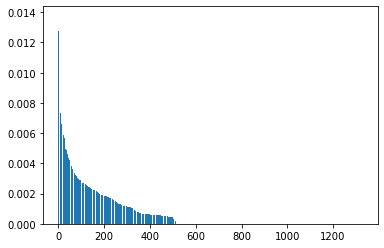

In [12]:
# sort the importance
sorted_importance = np.sort(importance)[::-1]
pyplot.bar([x for x in range(len(sorted_importance))], sorted_importance)
pyplot.show()

In [77]:
new_csv

,labels,AATSC3dv,AATSC3i,AATSC0v,MATS3m,ATSC0se,GATS1dv,piPC2,ATSC1pe,ZMIC0,...,SRW03,SRW05,SRW07,SRW08,SRW10,MW,AMW,WPath,Zagreb1,Zagreb2
0,13.985605,-0.689360,-0.199993,10.654363,-0.135727,-0.024738,0.763373,5.698979,1.245879,29.873155,...,2.397895,4.727388,6.842683,10.381862,276.078644,789.0,42.0,122.0,6.861111,4.444444
1,15.734286,-0.093943,0.072151,-0.521147,0.016643,-0.218919,1.070423,5.382199,-0.578914,32.301618,...,0.000000,0.000000,0.000000,10.181309,389.222355,2738.0,44.0,150.0,7.638889,6.500000
2,14.976295,0.421944,0.058220,-6.786017,0.186753,-0.165259,1.073511,5.128418,-0.424495,40.529030,...,0.000000,0.000000,0.000000,9.841240,339.087412,1884.0,34.0,122.0,9.638889,5.555556
3,17.883302,-0.198529,0.075026,-0.639284,-0.029407,-0.268710,1.036427,5.431536,-0.233273,38.607565,...,0.000000,0.000000,0.000000,10.304911,417.253655,3006.0,50.0,160.0,8.750000,7.000000
4,13.985605,-1.002796,-0.234219,9.435143,-0.201790,-0.136156,0.805599,5.573104,1.405533,26.294667,...,2.397895,4.727388,6.842683,10.381862,278.094294,789.0,42.0,122.0,6.861111,4.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,16.322550,-0.053946,0.007238,-2.439134,0.007000,0.155016,1.037133,5.401551,-0.964788,32.541461,...,0.000000,0.000000,0.000000,10.250087,391.218018,2616.0,46.0,152.0,8.250000,6.388889
59,7.343579,-0.443682,-0.079506,-3.717260,-0.284772,0.040614,1.095138,3.988984,-0.288675,19.237428,...,2.397895,4.595120,6.605298,9.161465,156.045870,105.0,12.0,52.0,2.833333,2.222222
60,14.976295,-0.126026,0.000841,-4.717709,0.064509,-0.047445,1.056158,4.903421,-0.432089,40.685868,...,0.000000,0.000000,0.000000,9.841240,346.141638,1884.0,34.0,122.0,9.638889,5.555556
61,17.498620,-0.156852,-0.010608,-1.454661,-0.031552,0.653076,1.124068,5.460649,-1.956232,33.520179,...,0.000000,0.000000,0.000000,10.313973,430.248904,3587.0,50.0,166.0,9.611111,7.055556


# Start Here

In [2]:
def load_data(filename, n=0, take_all=False):
    # load the dataset as a pandas DataFrame
	data = pd.read_excel(filename)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	if(take_all):
		 X = dataset[:, 1:]
	else:
		X = dataset[:, 1:n]
	y = dataset[:, 0]
	return X, y

# Test All Algorithm

In [3]:
algorithms = {}
results_normal = []
results_tuned = []
train_results_normal = []
train_results_tuned = []

## Random Forest

In [4]:
# 10%-100% Feature Importance
X, y = load_data('train_new.xlsx', take_all=True)
total_features = X.shape[1]
scores = []
x_axis = []
real_x_axis = []
for i in range(1, 11):
    perc = i / 10;
    print('===================================================')
    print(f"Processing: {perc*100}% of total feature importance")
    n = int(np.floor(total_features * perc))
    X, y = load_data('train_new.xlsx', n=n)
    print('Training...')
    model = RandomForestClassifier(random_state=46)
    model.fit(X, y)
    print('Predicting...')
    score = cross_val_score(model, X, y, cv=5)
    print(f"Score: {score.mean()}")
    scores.append(score.mean())
    x_axis.append(i*10)
    real_x_axis.append(i)

Processing: 10.0% of total feature importance
Training...
Predicting...
Score: 0.6666666666666667
Processing: 20.0% of total feature importance
Training...
Predicting...
Score: 0.6666666666666667
Processing: 30.0% of total feature importance
Training...
Predicting...
Score: 0.6666666666666667
Processing: 40.0% of total feature importance
Training...
Predicting...
Score: 0.6051282051282052
Processing: 50.0% of total feature importance
Training...
Predicting...
Score: 0.6192307692307691
Processing: 60.0% of total feature importance
Training...
Predicting...
Score: 0.6346153846153846
Processing: 70.0% of total feature importance
Training...
Predicting...
Score: 0.6012820512820513
Processing: 80.0% of total feature importance
Training...
Predicting...
Score: 0.6371794871794871
Processing: 90.0% of total feature importance
Training...
Predicting...
Score: 0.6025641025641025
Processing: 100.0% of total feature importance
Training...
Predicting...
Score: 0.6192307692307693


In [5]:
algorithms['random_forest'] = {
    'real_x_axis': real_x_axis,
    'scores': scores
}

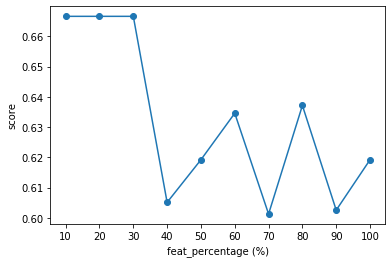

In [6]:
plt.plot(real_x_axis, scores, marker = 'o')
plt.xlabel('feat_percentage (%)')
plt.ylabel('score')
plt.xticks(real_x_axis, x_axis)
plt.show()

In [7]:
best_n_feature = np.argmax(scores)
train_results_normal.append(scores[best_n_feature])
(best_n_feature + 1)/10

0.1

### Untuned

In [9]:
best_score_idx = np.argmax(algorithms['random_forest']['scores'])
n_feature = int(real_x_axis[best_score_idx]* ((best_n_feature + 1)/10) * total_features)
X, y = load_data('train_new.xlsx', n=n_feature)
print('Training...')
model = RandomForestClassifier(random_state=46, n_estimators=250, criterion='entropy')
model.fit(X, y)
print('Predicting...')
X_test, y_test = load_data('test_new.xlsx', n=n_feature)
score = cross_val_score(model, X_test, y_test, cv=5)
print(f"Score: {score.mean()}")

Training...
Predicting...
Score: 0.7133333333333333


In [10]:
results_normal.append(score.mean())

In [11]:
tn, fp, fn, tp = confusion_matrix(y, model.predict(X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)

In [14]:
print("Untuned RF - Train")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Untuned RF - Train
recall: 1.0
precision: 1.0
f1: 1.0
accuracy: 1.0


In [15]:
tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)

In [16]:
print("Untuned RF - Test")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Untuned RF - Test
recall: 0.07142857142857142
precision: 1.0
f1: 0.13333333333333333
accuracy: 0.5185185185185185


### Tuned

In [17]:
hyperparameter = {
    'n_estimators': [50*i for i in range(1, 11)],
    'criterion': ['gini', 'entropy']
}
model = RandomForestClassifier(random_state=46)
grid = GridSearchCV(model, hyperparameter, cv=5, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=46,
                                  

In [18]:
print('Best param:', grid.best_params_)
print('Best score:', grid.best_score_)

Best param: {'criterion': 'entropy', 'n_estimators': 250}
Best score: 0.6974358974358974


In [19]:
train_results_tuned.append(grid.best_score_)

In [20]:
score = cross_val_score(grid.best_estimator_, X_test, y_test, cv=5)
print(f"Score: {score.mean()}")

Score: 0.7133333333333333


In [21]:
results_tuned.append(score.mean())

In [23]:
tn, fp, fn, tp = confusion_matrix(y, grid.best_estimator_.predict(X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned RF - Train")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, grid.best_estimator_.predict(X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned RF - Test")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Tuned RF - Train
recall: 1.0
precision: 1.0
f1: 1.0
accuracy: 1.0

Tuned RF - Test
recall: 0.07142857142857142
precision: 1.0
f1: 0.13333333333333333
accuracy: 0.5185185185185185


## AdaBoost(Default)

In [24]:
# 10%-100% Feature Importance
X, y = load_data('train_new.xlsx', take_all=True)
total_features = X.shape[1]
scores = []
x_axis = []
real_x_axis = []
for i in range(1, 11):
    perc = i / 10;
    print('===================================================')
    print(f"Processing: {perc*100}% of total feature importance")
    n = int(np.floor(total_features * perc))
    X, y = load_data('train_new.xlsx', n=n)
    print('Training...')
    model = AdaBoostClassifier(random_state=46)
    model.fit(X, y)
    print('Predicting...')
    score = cross_val_score(model, X, y, cv=5)
    print(f"Score: {score.mean()}")
    scores.append(score.mean())
    x_axis.append(i*10)
    real_x_axis.append(i)

Processing: 10.0% of total feature importance
Training...
Predicting...
Score: 0.6025641025641025
Processing: 20.0% of total feature importance
Training...
Predicting...
Score: 0.5435897435897437
Processing: 30.0% of total feature importance
Training...
Predicting...
Score: 0.5576923076923077
Processing: 40.0% of total feature importance
Training...
Predicting...
Score: 0.5871794871794872
Processing: 50.0% of total feature importance
Training...
Predicting...
Score: 0.5230769230769231
Processing: 60.0% of total feature importance
Training...
Predicting...
Score: 0.5102564102564103
Processing: 70.0% of total feature importance
Training...
Predicting...
Score: 0.5102564102564103
Processing: 80.0% of total feature importance
Training...
Predicting...
Score: 0.5384615384615385
Processing: 90.0% of total feature importance
Training...
Predicting...
Score: 0.5076923076923077
Processing: 100.0% of total feature importance
Training...
Predicting...
Score: 0.5564102564102564


In [25]:
algorithms['adaboost_default'] = {
    'real_x_axis': real_x_axis,
    'scores': scores
}

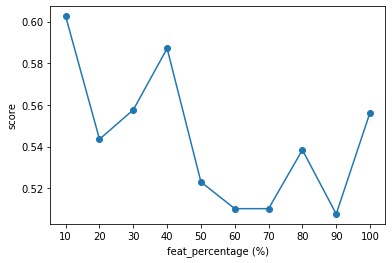

In [26]:
plt.plot(real_x_axis, scores, marker = 'o')
plt.xlabel('feat_percentage (%)')
plt.ylabel('score')
plt.xticks(real_x_axis, x_axis)
plt.show()


In [27]:
best_n_feature = np.argmax(scores)
train_results_normal.append(scores[best_n_feature])
(best_n_feature + 1)/10

0.1

### Untuned

In [28]:
best_score_idx = np.argmax(algorithms['adaboost_default']['scores'])
n_feature = int(real_x_axis[best_score_idx]* ((best_n_feature + 1)/10) * total_features)
X, y = load_data('train_new.xlsx', n=n_feature)
print('Training...')
model = AdaBoostClassifier(random_state=46)
model.fit(X, y)
print('Predicting...')
X_test, y_test = load_data('test_new.xlsx', n=n_feature)
score = cross_val_score(model, X_test, y_test, cv=5)
print(f"Score: {score.mean()}")

Training...
Predicting...
Score: 0.7533333333333333


In [29]:
results_normal.append(score.mean())

In [30]:
tn, fp, fn, tp = confusion_matrix(y, model.predict(X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Untuned Adaboost (Default) - Train")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Untuned Adaboost (Default) - Test")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Untuned Adaboost (Default) - Train
recall: 1.0
precision: 1.0
f1: 1.0
accuracy: 1.0

Untuned Adaboost (Default) - Test
recall: 0.0
precision: nan
f1: 0.0
accuracy: 0.48148148148148145


C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
  


### Tuned

In [31]:
hyperparameter = {
    'n_estimators': [50*i for i in range(1, 11)],
    'learning_rate': [0.001*(10**i) for i in range(5)],
    'algorithm': ['SAMME', 'SAMME.R']
}
model = AdaBoostClassifier(random_state=46)
grid = GridSearchCV(model, hyperparameter, cv=5)
grid.fit(X, y)

C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\sklearn\ensemble\_weight_boosting.py:604: RuntimeWarning: overflow encountered in exp
  (sample_weight > 0))
C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\sklearn\ensemble\_weight_boosting.py:163: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\sklearn\ensemble\_weight_boosting.py:604: RuntimeWarning: overflow encountered in exp
  (sample_weight > 0))
C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\sklearn\ensemble\_weight_boosting.py:163: RuntimeWarning: invalid value encountered in true_divide
  sample

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=46),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
print('Best param:', grid.best_params_)
print('Best score:', grid.best_score_)

Best param: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100}
Best score: 0.7179487179487181


In [33]:
train_results_tuned.append(grid.best_score_)

In [34]:
score = cross_val_score(grid.best_estimator_, X_test, y_test, cv=5)
print(f"Score: {score.mean()}")

Score: 0.7866666666666667


In [35]:
results_tuned.append(score.mean())

In [36]:
tn, fp, fn, tp = confusion_matrix(y, grid.best_estimator_.predict(X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned Adaboost (Default) - Train")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, grid.best_estimator_.predict(X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned Adaboost (Default) - Test")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Tuned Adaboost (Default) - Train
recall: 1.0
precision: 1.0
f1: 1.0
accuracy: 1.0

Tuned Adaboost (Default) - Test
recall: 0.0
precision: nan
f1: 0.0
accuracy: 0.48148148148148145


C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
  


## AdaBoost(RF)

In [37]:
# 10%-100% Feature Importance
X, y = load_data('train_new.xlsx', take_all=True)
total_features = X.shape[1]
scores = []
x_axis = []
real_x_axis = []
for i in range(1, 11):
    perc = i / 10;
    print('===================================================')
    print(f"Processing: {perc*100}% of total feature importance")
    n = int(np.floor(total_features * perc))
    X, y = load_data('train_new.xlsx', n=n)
    print('Training...')
    model = AdaBoostClassifier(RandomForestClassifier(random_state=46, criterion='entropy', n_estimators=250), random_state=46)
    model.fit(X, y)
    print('Predicting...')
    score = cross_val_score(model, X, y, cv=5)
    print(f"Score: {score.mean()}")
    scores.append(score.mean())
    x_axis.append(i*10)
    real_x_axis.append(i)

Processing: 10.0% of total feature importance
Training...
Predicting...
Score: 0.6807692307692308
Processing: 20.0% of total feature importance
Training...
Predicting...
Score: 0.6512820512820513
Processing: 30.0% of total feature importance
Training...
Predicting...
Score: 0.6358974358974359
Processing: 40.0% of total feature importance
Training...
Predicting...
Score: 0.6512820512820514
Processing: 50.0% of total feature importance
Training...
Predicting...
Score: 0.6512820512820514
Processing: 60.0% of total feature importance
Training...
Predicting...
Score: 0.5884615384615385
Processing: 70.0% of total feature importance
Training...
Predicting...
Score: 0.5884615384615385
Processing: 80.0% of total feature importance
Training...
Predicting...
Score: 0.5717948717948718
Processing: 90.0% of total feature importance
Training...
Predicting...
Score: 0.6038461538461538
Processing: 100.0% of total feature importance
Training...
Predicting...
Score: 0.6217948717948718


In [38]:
algorithms['adaboost_rf'] = {
    'real_x_axis': real_x_axis,
    'scores': scores
}

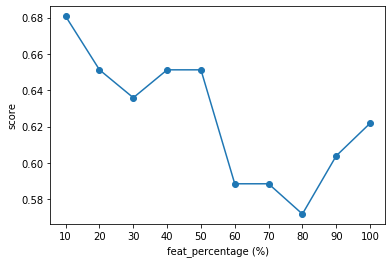

In [39]:
plt.plot(real_x_axis, scores, marker = 'o')
plt.xlabel('feat_percentage (%)')
plt.ylabel('score')
plt.xticks(real_x_axis, x_axis)
plt.show()


In [40]:
best_n_feature = np.argmax(scores)
train_results_normal.append(scores[best_n_feature])
(best_n_feature + 1)/10

0.1

### Untuned

In [41]:
best_score_idx = np.argmax(algorithms['adaboost_rf']['scores'])
n_feature = int(real_x_axis[best_score_idx]* ((best_n_feature + 1)/10) * total_features)
X, y = load_data('train_new.xlsx', n=n_feature)
print('Training...')
model = AdaBoostClassifier(RandomForestClassifier(random_state=46, criterion='entropy', n_estimators=250), random_state=46)
model.fit(X, y)
print('Predicting...')
X_test, y_test = load_data('test_new.xlsx', n=n_feature)
score = cross_val_score(model, X_test, y_test, cv=5)
print(f"Score: {score.mean()}")

Training...
Predicting...
Score: 0.7133333333333333


In [42]:
results_normal.append(score.mean())

In [43]:
tn, fp, fn, tp = confusion_matrix(y, model.predict(X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Untuned Adaboost (RF) - Train")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Untuned Adaboost (RF) - Test")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Untuned Adaboost (RF) - Train
recall: 1.0
precision: 1.0
f1: 1.0
accuracy: 1.0

Untuned Adaboost (RF) - Test
recall: 0.07142857142857142
precision: 1.0
f1: 0.13333333333333333
accuracy: 0.5185185185185185


### Tuned

In [44]:
hyperparameter = {
    'n_estimators': [50*i for i in range(1, 11)],
    'learning_rate': [0.001*(10**i) for i in range(5)],
    'algorithm': ['SAMME', 'SAMME.R']
}
model = AdaBoostClassifier(RandomForestClassifier(random_state=46, criterion='entropy', n_estimators=250), random_state=46)
grid = GridSearchCV(model, hyperparameter, cv=5)
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='entropy',
                                                                                max_depth=None,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                max_samples=None,
                                                                                min_impurity_decrease=0.0,
       

In [45]:
print('Best param:', grid.best_params_)
print('Best score:', grid.best_score_)

Best param: {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}
Best score: 0.6807692307692308


In [46]:
train_results_tuned.append(grid.best_score_)

In [47]:
score = cross_val_score(grid.best_estimator_, X_test, y_test, cv=5)
print(f"Score: {score.mean()}")

Score: 0.7133333333333333


In [48]:
results_tuned.append(score.mean())

In [49]:
tn, fp, fn, tp = confusion_matrix(y, grid.best_estimator_.predict(X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned Adaboost (RF) - Train")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, grid.best_estimator_.predict(X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned Adaboost (RF) - Test")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Tuned Adaboost (RF) - Train
recall: 1.0
precision: 1.0
f1: 1.0
accuracy: 1.0

Tuned Adaboost (RF) - Test
recall: 0.07142857142857142
precision: 1.0
f1: 0.13333333333333333
accuracy: 0.5185185185185185


## AdaBoost(SVC)

In [3]:
X, y = load_data('train_new.xlsx', take_all=True)
X

array([[ 1.00177150e+00,  1.11454639e+00, -2.51296490e-02, ...,
         1.54000000e+02,  6.86111111e+00,  4.44444444e+00],
       [ 1.07784133e+00,  9.58309708e-01, -1.99369230e-02, ...,
         1.74000000e+02,  7.63888889e+00,  6.50000000e+00],
       [ 1.10548380e+00,  8.95374201e-01, -4.19460300e-02, ...,
         1.36000000e+02,  9.63888889e+00,  5.55555556e+00],
       ...,
       [ 1.08987463e+00,  9.45605212e-01, -3.29239570e-02, ...,
         1.36000000e+02,  9.63888889e+00,  5.55555556e+00],
       [ 1.08541782e+00,  1.02453690e+00, -3.05998400e-03, ...,
         1.93000000e+02,  9.61111111e+00,  7.05555556e+00],
       [ 1.15386792e+00,  9.87524202e-01, -1.81387980e-02, ...,
         1.43000000e+02,  7.63888889e+00,  5.11111111e+00]])

In [50]:
# 10%-100% Feature Importance
X, y = load_data('train_new.xlsx', take_all=True)
total_features = X.shape[1]
scores = []
x_axis = []
real_x_axis = []
for i in range(1, 11):
    perc = i / 10;
    print('===================================================')
    print(f"Processing: {perc*100}% of total feature importance")
    n = int(np.floor(total_features * perc))
    X, y = load_data('train_new.xlsx', n=n)
    print('Training...')
    model = AdaBoostClassifier(SVC(), algorithm='SAMME')
    model.fit(X, y)
    print('Predicting...')
    score = cross_val_score(model, X, y, cv=5)
    print(f"Score: {score.mean()}")
    scores.append(score.mean())
    x_axis.append(i*10)
    real_x_axis.append(i)

Processing: 10.0% of total feature importance
Training...
Predicting...
Score: 0.5871794871794872
Processing: 20.0% of total feature importance
Training...
Predicting...
Score: 0.5871794871794872
Processing: 30.0% of total feature importance
Training...
Predicting...
Score: 0.5871794871794872
Processing: 40.0% of total feature importance
Training...
Predicting...
Score: 0.5871794871794872
Processing: 50.0% of total feature importance
Training...
Predicting...
Score: 0.5871794871794872
Processing: 60.0% of total feature importance
Training...
Predicting...
Score: 0.5871794871794872
Processing: 70.0% of total feature importance
Training...
Predicting...
Score: 0.5871794871794872
Processing: 80.0% of total feature importance
Training...
Predicting...
Score: 0.5871794871794872
Processing: 90.0% of total feature importance
Training...
Predicting...
Score: 0.5871794871794872
Processing: 100.0% of total feature importance
Training...
Predicting...
Score: 0.5871794871794872


In [51]:
algorithms['adaboost_svc'] = {
    'real_x_axis': real_x_axis,
    'scores': scores
}

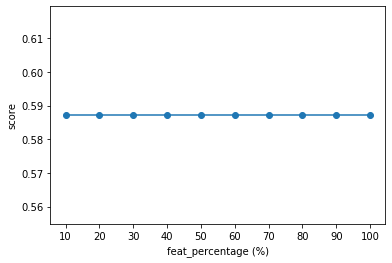

In [52]:
plt.plot(real_x_axis, scores, marker = 'o')
plt.xlabel('feat_percentage (%)')
plt.ylabel('score')
plt.xticks(real_x_axis, x_axis)
plt.show()


In [53]:
best_n_feature = np.argmax(scores)
train_results_normal.append(scores[best_n_feature])
(best_n_feature + 1)/10

0.1

### Untuned

In [54]:
best_score_idx = np.argmax(algorithms['random_forest']['scores'])
n_feature = int(real_x_axis[best_score_idx]* ((best_n_feature + 1)/10) * total_features)
X, y = load_data('train_new.xlsx', n=n_feature)
print('Training...')
model = AdaBoostClassifier(SVC(), random_state=46, algorithm='SAMME')
model.fit(X, y)
print('Predicting...')
X_test, y_test = load_data('test_new.xlsx', n=n_feature)
score = cross_val_score(model, X_test, y_test, cv=5)
print(f"Score: {score.mean()}")

Training...
Predicting...
Score: 0.48


In [55]:
results_normal.append(score.mean())

In [56]:
tn, fp, fn, tp = confusion_matrix(y, model.predict(X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Untuned Adaboost (SVC) - Train")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Untuned Adaboost (SVC) - Test")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Untuned Adaboost (SVC) - Train
recall: 0.6153846153846154
precision: 0.5714285714285714
f1: 0.5925925925925926
accuracy: 0.6507936507936508

Untuned Adaboost (SVC) - Test
recall: 1.0
precision: 0.5185185185185185
f1: 0.6829268292682927
accuracy: 0.5185185185185185


### Tuned

In [57]:
hyperparameter = {
    'n_estimators': [50*i for i in range(1, 11)],
    'learning_rate': [0.001*(10**i) for i in range(5)],
    'algorithm': ['SAMME', 'SAMME.R']
}
model = AdaBoostClassifier(SVC(), random_state=46, algorithm='SAMME')
grid = GridSearchCV(model, hyperparameter, cv=5)
grid.fit(X, y)

C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\sklearn\ensemble\_weight_boosting.py:604: RuntimeWarning: overflow encountered in exp
  (sample_weight > 0))
C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\sklearn\ensemble\_weight_boosting.py:163: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid input - all samples have zero or negative weights.

  FitFailedWarning)
C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\sklearn\ensemble\_weight_boosting.py:604: RuntimeWarning: overflow encountered in exp
  (sample_weight > 0))
C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\sklearn\ensemble\_weight_boosting.py:163: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sa

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=SVC(C=1.0,
                                                             break_ties=False,
                                                             cache_size=200,
                                                             class_weight=None,
                                                             coef0=0.0,
                                                             decision_function_shape='ovr',
                                                             degree=3,
                                                             gamma='scale',
                                                             kernel='rbf',
                                                             max_iter=-1,
                                                             probability=False,
                                                           

In [58]:
print('Best param:', grid.best_params_)
print('Best score:', grid.best_score_)

Best param: {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}
Best score: 0.5871794871794872


In [59]:
train_results_tuned.append(grid.best_score_)

In [60]:
score = cross_val_score(grid.best_estimator_, X_test, y_test, cv=5)
print(f"Score: {score.mean()}")

Score: 0.48


In [61]:
results_tuned.append(score.mean())

In [62]:
tn, fp, fn, tp = confusion_matrix(y, grid.best_estimator_.predict(X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned Adaboost (SVC) - Train")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, grid.best_estimator_.predict(X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned Adaboost (SVC) - Test")
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Tuned Adaboost (SVC) - Train
recall: 0.0
precision: nan
f1: 0.0
accuracy: 0.5873015873015873

Tuned Adaboost (SVC) - Test
recall: 0.0
precision: nan
f1: 0.0
accuracy: 0.48148148148148145


C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\share\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [332]:
confusion_matrix(y_test, grid.predict(X_test))

array([[13,  0],
       [14,  0]], dtype=int64)

In [333]:
print(classification_report(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.48      1.00      0.65        13
         1.0       0.00      0.00      0.00        14

    accuracy                           0.48        27
   macro avg       0.24      0.50      0.33        27
weighted avg       0.23      0.48      0.31        27



C:\Users\RL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Plot Result

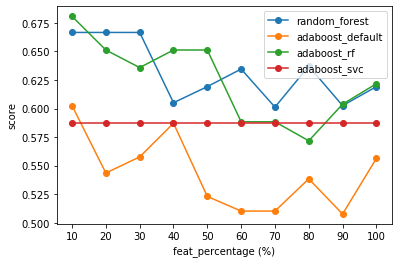

In [63]:
for algorithm in algorithms:
    plt.plot(algorithms[algorithm]['real_x_axis'], algorithms[algorithm]['scores'], label=algorithm, marker = 'o')
    
plt.xlabel('feat_percentage (%)')
plt.ylabel('score')
plt.xticks(real_x_axis, x_axis)
plt.legend()
plt.show()

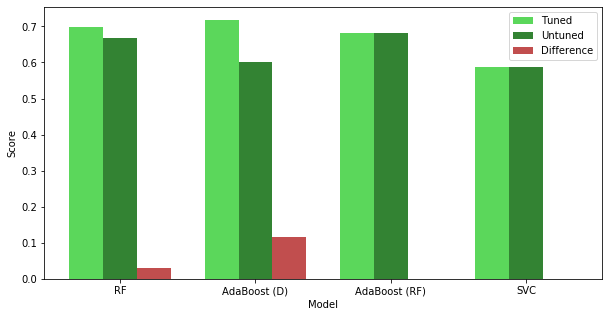

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
index = np.arange(len(train_results_normal))
bar_width = 0.25
opacity = 0.8


bar1 = plt.bar(index, train_results_tuned, bar_width, alpha=opacity, color='limegreen', label='Tuned')
bar2 = plt.bar(index + bar_width, train_results_normal, bar_width, alpha=opacity, color='darkgreen', label='Untuned')
bar3 = plt.bar(index + bar_width + bar_width, np.array(train_results_tuned) - np.array(train_results_normal), bar_width, alpha=opacity, color='firebrick', label='Difference')

plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(index + (bar_width), ('RF', 'AdaBoost (D)', 'AdaBoost (RF)', 'SVC'))
plt.legend()

plt.show()

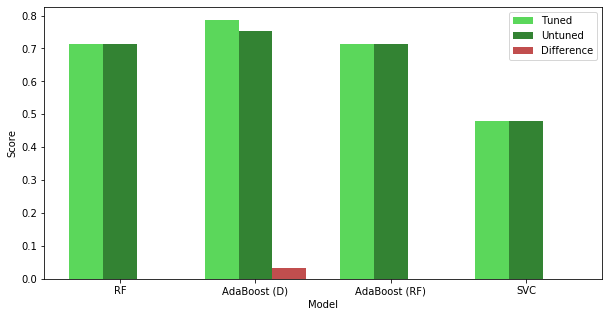

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
index = np.arange(len(results_normal))
bar_width = 0.25
opacity = 0.8


bar1 = plt.bar(index, results_tuned, bar_width, alpha=opacity, color='limegreen', label='Tuned')
bar2 = plt.bar(index + bar_width, results_normal, bar_width, alpha=opacity, color='darkgreen', label='Untuned')
bar3 = plt.bar(index + bar_width + bar_width, np.array(results_tuned) - np.array(results_normal), bar_width, alpha=opacity, color='firebrick', label='Difference')

plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(index + (bar_width), ('RF', 'AdaBoost (D)', 'AdaBoost (RF)', 'SVC'))
plt.legend()

plt.show()


[0.7133333333333333, 0.5933333333333333, 0.7466666666666667, 0.48]

In [2]:
# Tuning Hyperparameter
hyperparamter = {
    'n_estimators': [50*i for i in range(1, 11)],
    'learning_rate': [0.001*(10**i) for i in range(5)],
    'algorithm': ['SAMME', 'SAMME.R'],
    'base_estimator': [RandomForestClassifier(random_state=46), None, SVC(), SGDClassifier(), KNeighborsClassifier()]
}

In [3]:
hyperparamter

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
 'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
 'algorithm': ['SAMME', 'SAMME.R'],
 'base_estimator': [RandomForestClassifier(random_state=46),
  None,
  SVC(),
  SGDClassifier(),
  KNeighborsClassifier()]}

In [8]:
X, y = load_data('train_new.xlsx', n=int(.1*total_features))
model = AdaBoostClassifier(random_state=46)
grid = GridSearchCV(model, hyperparamter, n_jobs=-1, verbose=3)
grid.fit(X, y)

NameError: name 'total_features' is not defined

In [44]:
print('Best param:', grid.best_params_)
print('Best score:', grid.best_score_)

Best param: {'algorithm': 'SAMME', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 100}
Best score: 0.7179487179487181


In [4]:
X_test, y_test = load_data('test_new.xlsx', n=int(.1*total_features))
y_pred = grid.predict(X_test)

NameError: name 'load_data' is not defined

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.48      1.00      0.65        13
         1.0       0.00      0.00      0.00        14

    accuracy                           0.48        27
   macro avg       0.24      0.50      0.33        27
weighted avg       0.23      0.48      0.31        27



C:\Users\RL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
y_pred_train = grid.predict(X)
acc_score_train = accuracy_score(y, y_pred_train)
acc_score_test = accuracy_score(y_test, y_pred)

In [60]:
print('acc score train:', acc_score_train)
print('acc score test:', acc_score_test)

acc score train: 1.0
acc score test: 0.48148148148148145
